In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(1000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[2.82652365e-01 2.39043015e-01 2.71752642e-04]
  [5.71335945e-01 2.39043015e-01 2.71752642e-04]
  [5.71335945e-01 2.82652365e-01 2.71752642e-04]
  [5.71335945e-01 2.82652365e-01 2.39043015e-01]]

 [[6.60333235e-01 4.09459437e-01 2.82214893e-01]
  [8.29044603e-01 4.09459437e-01 2.82214893e-01]
  [8.29044603e-01 6.60333235e-01 2.82214893e-01]
  [8.29044603e-01 6.60333235e-01 4.09459437e-01]]

 [[4.36028477e-01 2.52591939e-01 1.95378546e-01]
  [6.22992291e-01 2.52591939e-01 1.95378546e-01]
  [6.22992291e-01 4.36028477e-01 1.95378546e-01]
  [6.22992291e-01 4.36028477e-01 2.52591939e-01]]

 ...

 [[5.33983752e-01 4.51210573e-01 3.69677300e-02]
  [8.31531907e-01 4.51210573e-01 3.69677300e-02]
  [8.31531907e-01 5.33983752e-01 3.69677300e-02]
  [8.31531907e-01 5.33983752e-01 4.51210573e-01]]

 [[6.09200631e-01 4.22362341e-01 4.05502296e-01]
  [7.73297376e-01 4.22362341e-01 4.05502296e-01]
  [7.73297376e-01 6.09200631e-01 4.05502296e-01]
  [7.73297376e-01 6.09200631e-01 4.22362341e-01]]

 [[4

In [4]:
pool = []
for i in range(0,41):
    pool.append(float(i-20)/20)
pool=np.array(pool)
print(pool)

[-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15
  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75
  0.8   0.85  0.9   0.95  1.  ]


In [5]:
list_= np.ones(5)

def h_function(input_list):
    #input_list = sorted(input_list)
    h = list_[0]*max(sum(input_list),list_[1]) + list_[2] * max(input_list[0],list_[3]) + list_[4]
    return h
                
def brute_force(deep):
    if(deep >= 4):
        x_list = []
        y_list = []
        z_list = []
        result_list = []
        training_supervised_label=[]
        
        for index in range(len(training_data)):
            h_list = []
            for i in range(Agent_number_n):
                x_list.append(training_data[index][i][0])
                y_list.append(training_data[index][i][1])
                h = h_function(training_data[index][i])
                z_list.append(float(h))
                h_list.append(float(h))
            training_supervised_label.append(h_list)
            if(sum(h_list)/training_label[index]<2.9):
                return;
            if(sum(h_list)/training_label[index]>3.4):
                return;
            result_list.append(sum(h_list)/training_label[index]) 
            
        print(list_)
        print(max(result_list), min(result_list), max(result_list)-min(result_list))
        return;
    for i in range(len(pool)):
        list_[deep] = pool[i]
        brute_force(deep+1)
            

brute_force(0)

In [6]:
list_= [-1. ,  -1.  ,  0.92 ,-0.5  , 0.   , 1.  ]

def h_function(input_list):
    #input_list = sorted(input_list)
    h = list_[0]*max(sum(input_list),list_[1]) + list_[2] * max(sum(input_list),list_[3]) + list_[4] * max(input_list[0],list_[5]) + 3/4
    return h
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]

for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)

    result_list.append(sum(h_list)/training_label[index]) 

print(list_)
print(max(result_list), min(result_list), max(result_list)-min(result_list))

[-1.0, -1.0, 0.92, -0.5, 0.0, 1.0]
2.929979858955982 0.6010438312262951 2.3289360277296867


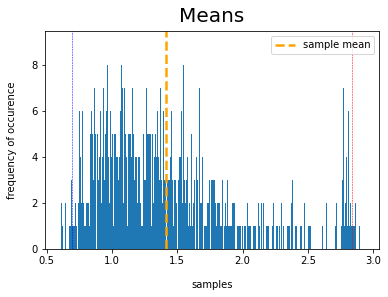

In [7]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [8]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), t*2/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(testing_data[index][i][0])
        y_list.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3749210163178307 2.999999999999999 0.3749210163178316


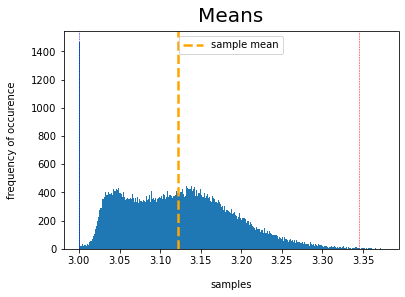

In [9]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()